In [47]:
import pandas as pd
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_path = '/content/drive/MyDrive/Colab Notebooks/chicago-crimes-analysis/data/prepared/crimes_chicago_prepared.parquet'
df = pd.read_parquet(df_path)

In [ ]:
os.makedirs('/content/drive/MyDrive/Colab Notebooks/chicago-crimes-analysis/dashbords/general_volume', exist_ok=True)
os.makedirs('/content/drive/MyDrive/Colab Notebooks/chicago-crimes-analysis/dashbords/crime_profile', exist_ok=True)
os.makedirs('/content/drive/MyDrive/Colab Notebooks/chicago-crimes-analysis/dashbords/police_efficiency', exist_ok=True)

In [4]:
save_general_volume = '/content/drive/MyDrive/Colab Notebooks/chicago-crimes-analysis/dashbords/general_volume/'
save_crime_profile = '/content/drive/MyDrive/Colab Notebooks/chicago-crimes-analysis/dashbords/crime_profile/'
save_police_efficiency = '/content/drive/MyDrive/Colab Notebooks/chicago-crimes-analysis/dashbords/police_efficiency/'

In [5]:
def save_show_general_volume(fig, filename):
    path = os.path.join(save_general_volume, filename)
    fig.tight_layout()
    fig.savefig(path, bbox_inches="tight")
    plt.show()
    return path

def save_show_crime_profile(fig, filename):
    path = os.path.join(save_crime_profile, filename)
    fig.tight_layout()
    fig.savefig(path, bbox_inches="tight")
    plt.show()
    return path

def save_show_police_efficiency(fig, filename):
    path = os.path.join(save_police_efficiency, filename)
    fig.tight_layout()
    fig.savefig(path, bbox_inches="tight")
    plt.show()
    return path

In [6]:
#Volume Geral

1000


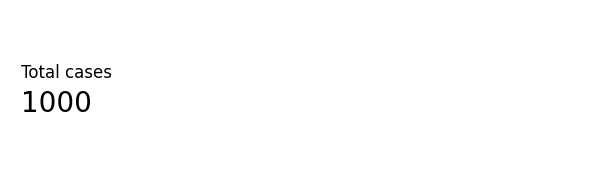

In [7]:
total_of_cases = len(df)
print(total_of_cases)

plt.figure(figsize=(6, 2))
plt.axis('off')
plt.text(0.02, 0.6, 'Total cases', fontsize=12)
plt.text(0.02, 0.4, total_of_cases, fontsize=20)
fig = plt.gcf()
save_show_general_volume(fig, 'total_of_cases.png')
plt.show()


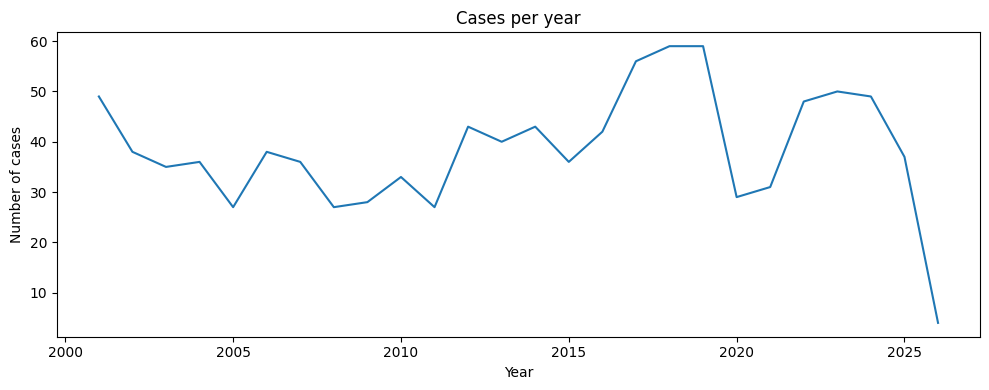

In [9]:
cases_per_year = df.groupby('year').size().sort_index()

plt.figure(figsize=(10,4))
sns.lineplot(x=cases_per_year.index, y=cases_per_year.values)
plt.title('Cases per year')
plt.xlabel('Year')
plt.ylabel('Number of cases')
plt.tight_layout()
fig = plt.gcf()
save_show_general_volume(fig, 'cases_per_year.png')
plt.show()

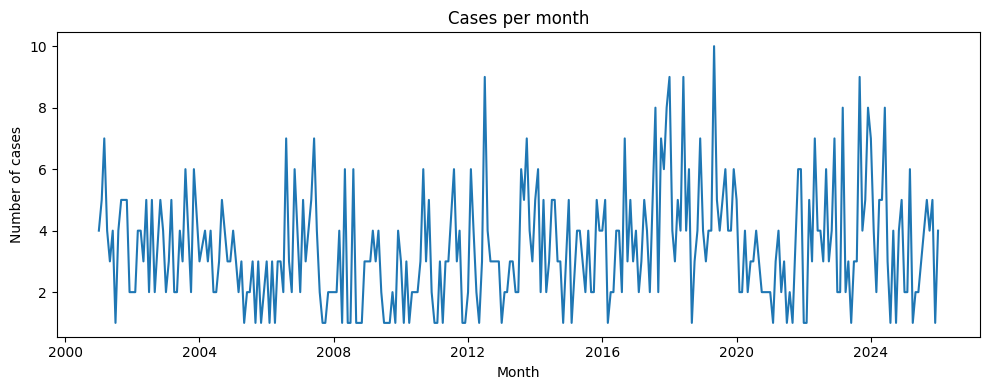

In [12]:
cases_per_month = df.groupby('month').size().sort_index()

plt.figure(figsize=(10,4))
sns.lineplot(x=cases_per_month.index.to_timestamp(), y=cases_per_month.values)
plt.title('Cases per month')
plt.xlabel('Month')
plt.ylabel('Number of cases')
plt.tight_layout()
fig = plt.gcf()
save_show_general_volume(fig, 'cases_per_month.png')
plt.show()

/tmp/ipython-input-2498471988.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  crimes_per_day_of_week = df.groupby('day_of_week').size().sort_values(ascending=False)


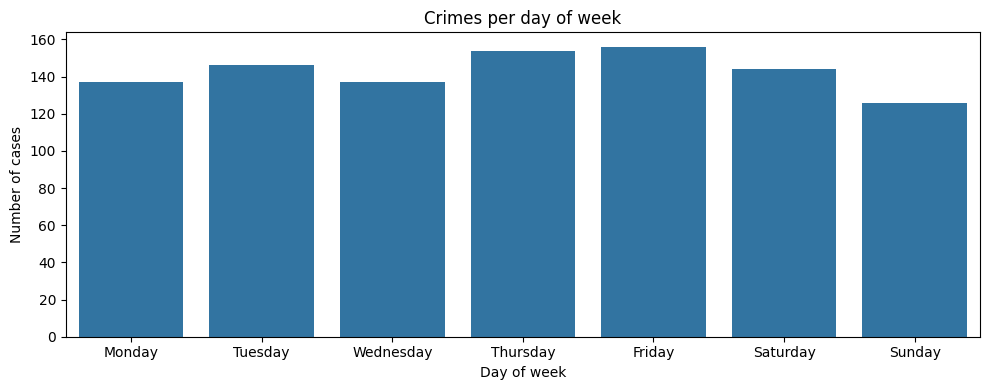

day_of_week
Friday       156
Thursday     154
Tuesday      146
Saturday     144
Monday       137
Wednesday    137
Sunday       126
dtype: int64


In [13]:
crimes_per_day_of_week = df.groupby('day_of_week').size().sort_values(ascending=False)

plt.figure(figsize=(10,4))
sns.barplot(x=crimes_per_day_of_week.index, y=crimes_per_day_of_week.values)
plt.title('Crimes per day of week')
plt.xlabel('Day of week')
plt.ylabel('Number of cases')
plt.tight_layout()
fig = plt.gcf()
save_show_general_volume(fig, 'crimes_per_day_of_week.png')

print(crimes_per_day_of_week)

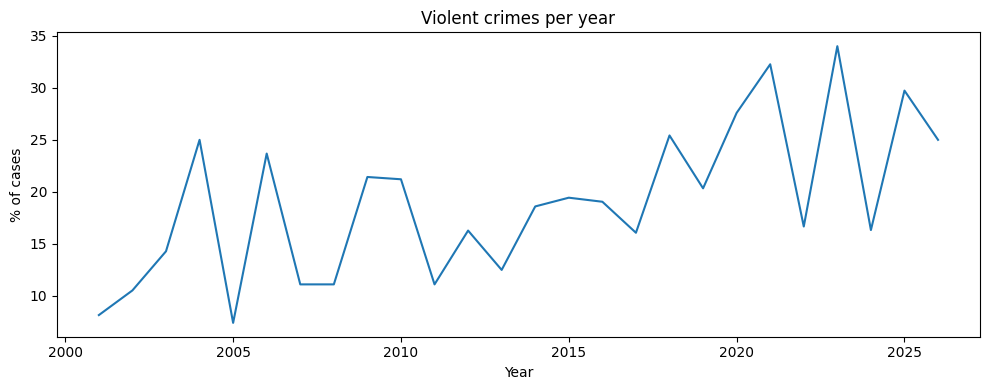

year
2001     8.16
2002    10.53
2003    14.29
2004    25.00
2005     7.41
2006    23.68
2007    11.11
2008    11.11
2009    21.43
2010    21.21
2011    11.11
2012    16.28
2013    12.50
2014    18.60
2015    19.44
2016    19.05
2017    16.07
2018    25.42
2019    20.34
2020    27.59
2021    32.26
2022    16.67
2023    34.00
2024    16.33
2025    29.73
2026    25.00
Name: is_violent, dtype: float64


In [17]:
violence_per_year = df.groupby('year')['is_violent'].mean() * 100
violence_per_year = round(violence_per_year, 2)

plt.figure(figsize=(10,4))
sns.lineplot(x=violence_per_year.index, y=violence_per_year.values)
plt.title('Violent crimes per year')
plt.xlabel('Year')
plt.ylabel('% of cases')
plt.tight_layout()
fig = plt.gcf()
save_show_general_volume(fig, 'violence_per_year.png')

In [ ]:
#Perfil Crime

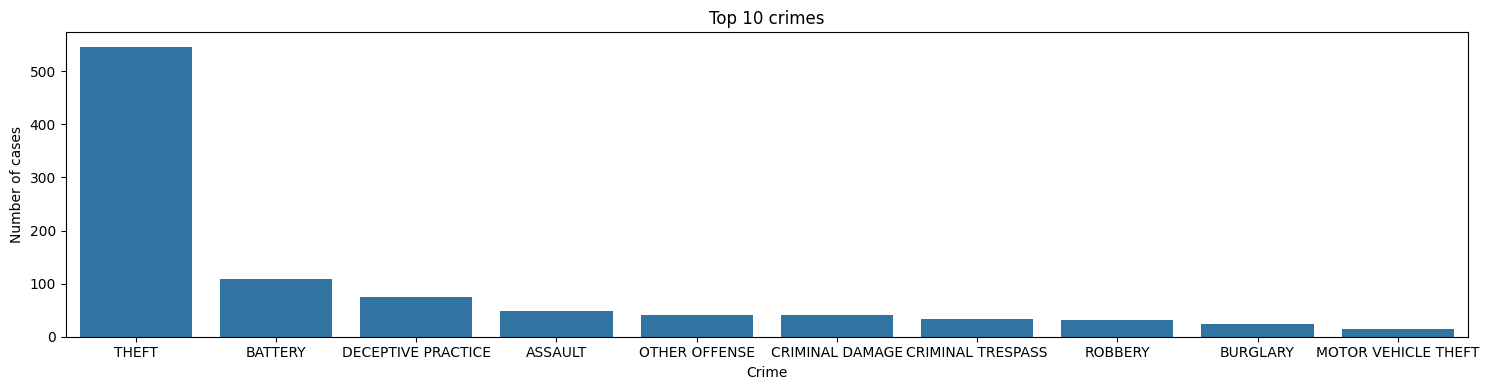

'/content/drive/MyDrive/Colab Notebooks/chicago-crimes-analysis/dashbords/crime_profile/top10_crimes.png'

In [21]:
top10_crimes = df['primary_type'].value_counts().head(10)

plt.figure(figsize=(15,4))
sns.barplot(x=top10_crimes.index, y=top10_crimes.values)
plt.title('Top 10 crimes')
plt.xlabel('Crime')
plt.ylabel('Number of cases')
plt.tight_layout()
fig = plt.gcf()
save_show_crime_profile(fig, 'top10_crimes.png')

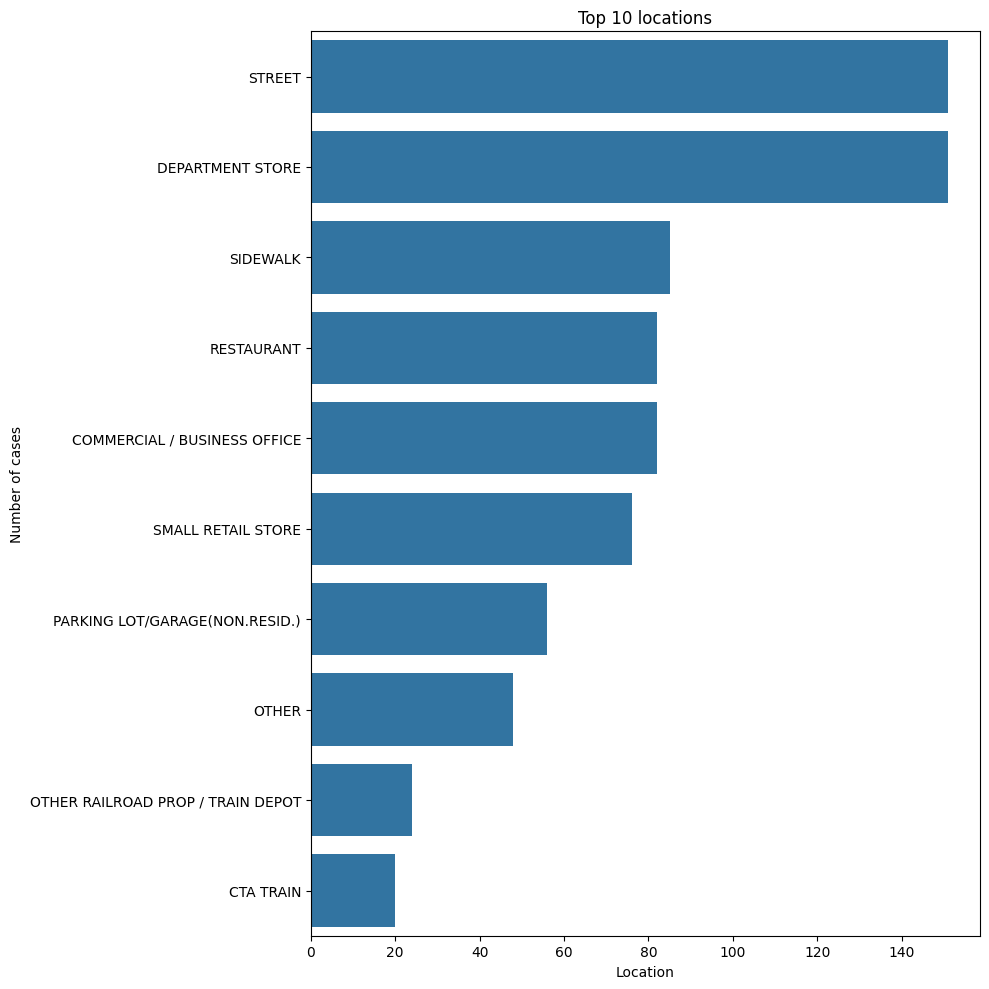

'/content/drive/MyDrive/Colab Notebooks/chicago-crimes-analysis/dashbords/crime_profile/top10_location.png'

In [25]:
top10_location = df['location_description'].value_counts().head(10)

plt.figure(figsize=(10,10))
sns.barplot(x=top10_location.values, y=top10_location.index)
plt.title('Top 10 locations')
plt.xlabel('Number of cases')
plt.ylabel('Location')
plt.tight_layout()
fig = plt.gcf()
save_show_crime_profile(fig, 'top10_location.png')

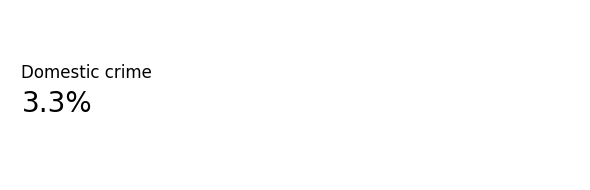

3.3 %


In [35]:
perc_domestic_crime = df['domestic'].mean() * 100
perc_domestic_crime = round(perc_domestic_crime, 2)
plt.figure(figsize=(6,2))
plt.axis('off')
plt.text(0.02, 0.6, 'Domestic crime', fontsize=12)
plt.text(0.02, 0.4, f"{perc_domestic_crime}%", fontsize=20)
fig = plt.gcf()
save_show_crime_profile(fig, 'perc_domestic_crime.png')

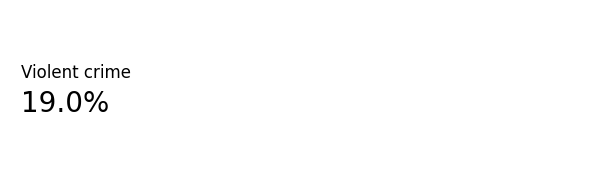

'/content/drive/MyDrive/Colab Notebooks/chicago-crimes-analysis/dashbords/crime_profile/perc_violent_crime.png'

In [37]:
perc_violent_crime = df['is_violent'].mean() * 100.
perc_violent_crime = round(perc_violent_crime, 2)

plt.figure(figsize=(6,2))
plt.axis('off')
plt.text(0.02, 0.6, 'Violent crime', fontsize=12)
plt.text(0.02, 0.4, f"{perc_violent_crime}%", fontsize=20)
fig = plt.gcf()
save_show_crime_profile(fig, 'perc_violent_crime.png')

In [ ]:
#Efetividade Policial

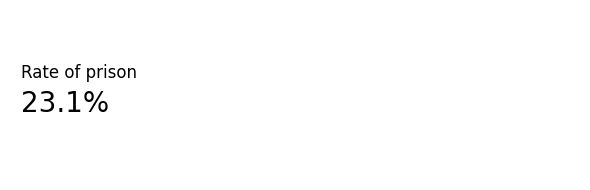

'/content/drive/MyDrive/Colab Notebooks/chicago-crimes-analysis/dashbords/police_efficiency/rate_prision.png'

In [38]:
rate_prision = df['arrest'].mean() * 100
rate_prision = round(rate_prision, 2)

plt.figure(figsize=(6,2))
plt.axis('off')
plt.text(0.02, 0.6, 'Rate of prison', fontsize=12)
plt.text(0.02, 0.4, f"{rate_prision}%", fontsize=20)
fig = plt.gcf()
save_show_police_efficiency(fig, 'rate_prision.png')

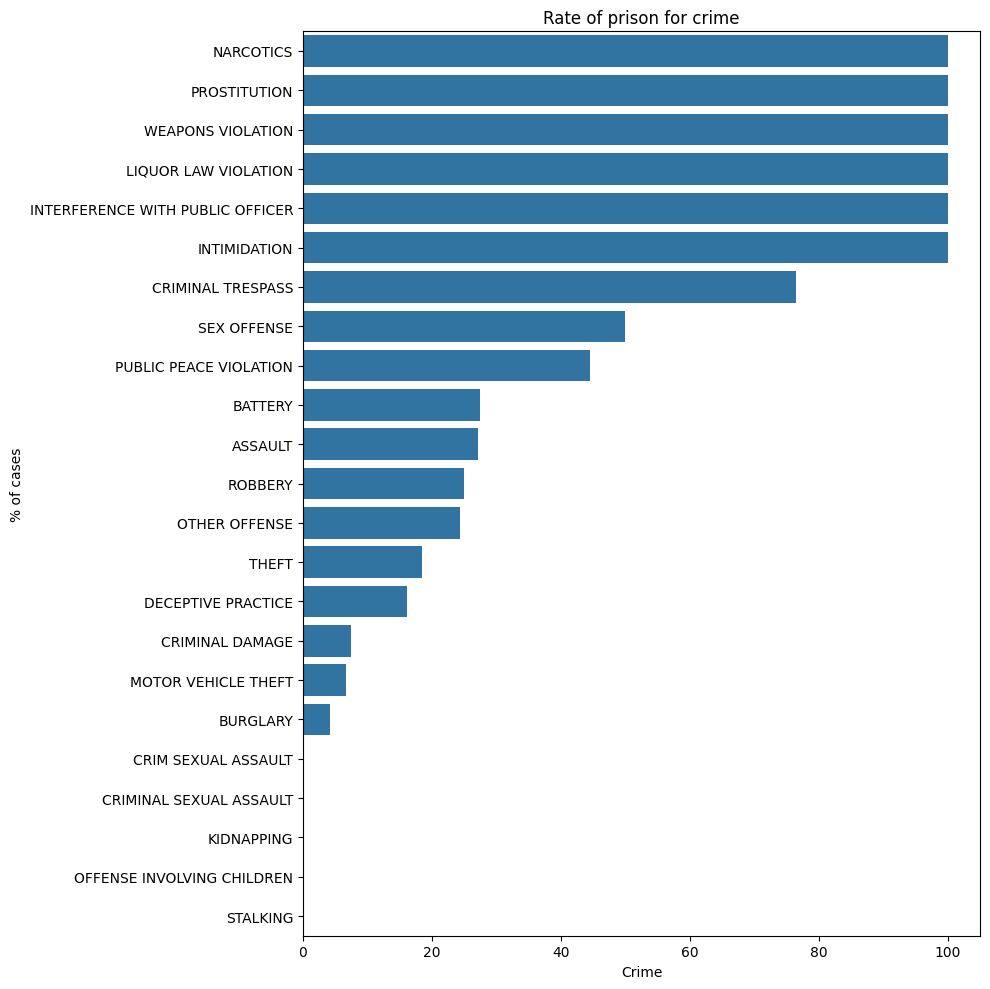

'/content/drive/MyDrive/Colab Notebooks/chicago-crimes-analysis/dashbords/police_efficiency/rate_prision_for_crime.png'

In [43]:
rate_prision_for_crime = df.groupby('primary_type')['arrest'].mean().sort_values(ascending=False)*100

plt.figure(figsize=(10,10))
sns.barplot(x=rate_prision_for_crime.values, y=rate_prision_for_crime.index)
plt.title('Rate of prison for crime')
plt.xlabel('Crime')
plt.ylabel('% of cases')
plt.tight_layout()
fig = plt.gcf()
save_show_police_efficiency(fig, 'rate_prision_for_crime.png')

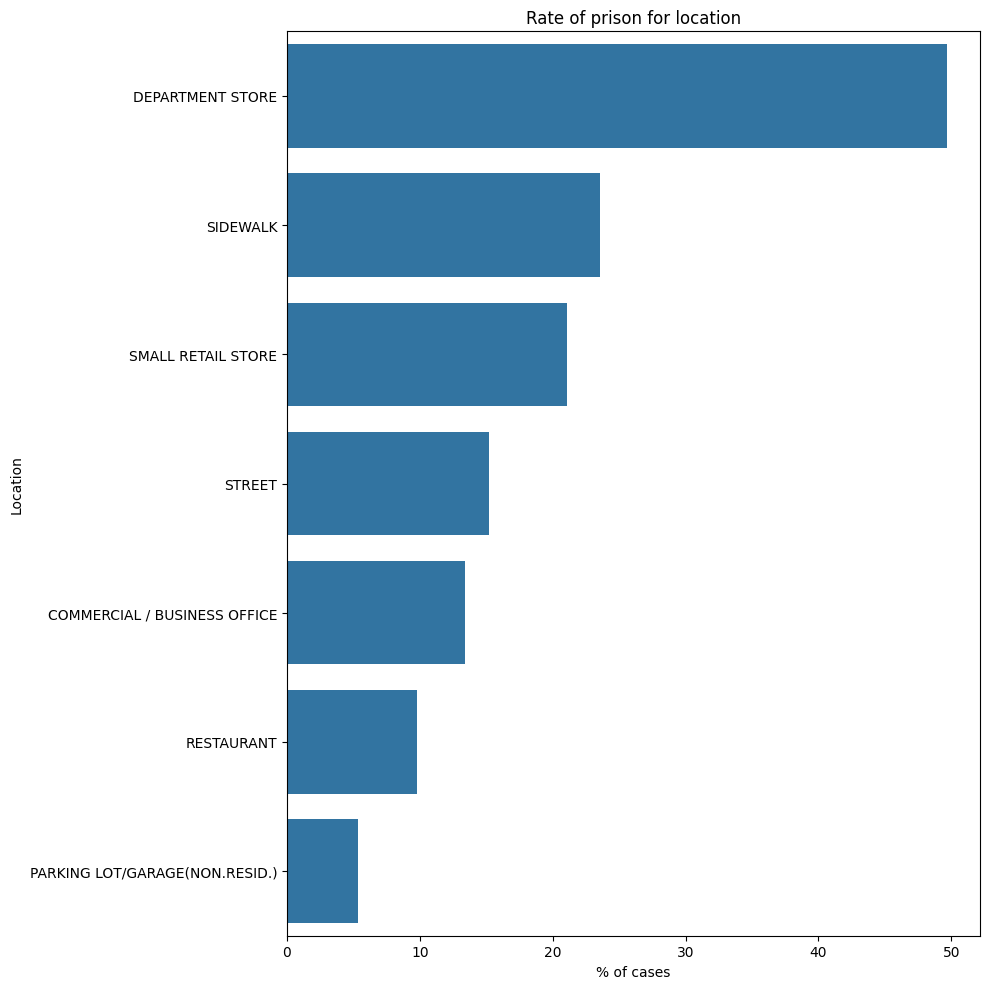

                                total       rate
location_description                            
DEPARTMENT STORE                  151  49.668874
SIDEWALK                           85  23.529412
SMALL RETAIL STORE                 76  21.052632
STREET                            151  15.231788
COMMERCIAL / BUSINESS OFFICE       82  13.414634
RESTAURANT                         82   9.756098
PARKING LOT/GARAGE(NON.RESID.)     56   5.357143


In [44]:
min_cases = 50

logic = df.groupby('location_description').agg(total=('arrest', 'size'), rate=('arrest', 'mean'))
rate_prision_for_location = (logic[logic['total'] >= min_cases].assign(rate=lambda x: x['rate']*100).sort_values('rate', ascending=False))

plt.figure(figsize=(10,10))
sns.barplot(x=rate_prision_for_location['rate'].values, y=rate_prision_for_location.index)
plt.title('Rate of prison for location')
plt.xlabel('% of cases')
plt.ylabel('Location')
plt.tight_layout()
fig = plt.gcf()
save_show_police_efficiency(fig, 'rate_prision_for_location.png')

In [48]:
print(f"Pandas version: {pd.__version__}")
print(f"Numpy version: {np.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")
print(f"Seaborn version: {sns.__version__}")

Pandas version: 2.2.2
Numpy version: 2.0.2
Matplotlib version: 3.10.0
Seaborn version: 0.13.2


In [49]:
!pip freeze > requirements.txt


In [ ]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns